In [1]:
import os
import re
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adata = sc.read_h5ad('scanpy.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 142243 × 1748
    obs: 'sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Time', 'Drug', 'Treatment'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [3]:
adata.obs

sample batch  n_genes  n_genes_by_counts  total_counts  \
AAACCCACAATGGCAG-1-0   Ov133     0     1307               1305        1931.0   
AAACCCACACAAGTGG-1-0   Ov133     0     1147               1145        1642.0   
AAACCCACAGTAGGAC-1-0   Ov133     0     1496               1494        2579.0   
AAACCCACAGTTAGAA-1-0   Ov133     0     2031               2029        3356.0   
AAACCCAGTTGTCAGT-1-0   Ov133     0      795                793        1102.0   
...                      ...   ...      ...                ...           ...   
TTTGGTTTCTCCTGTG-1-29   Ov86    29     1387               1385        2109.0   
TTTGTTGAGAAGTCTA-1-29   Ov86    29      675                673        1141.0   
TTTGTTGAGGCGATAC-1-29   Ov86    29     1430               1428        2556.0   
TTTGTTGTCACGACTA-1-29   Ov86    29      928                927        1493.0   
TTTGTTGTCTTTCTAG-1-29   Ov86    29     1367               1365        1976.0   

                       total_counts_mt  pct_counts_mt leiden Time  Drug  \
AAACCCACAATGGCAG-1-0             209.0      10.823408      0  T28  0353   
AAACCCACACAAGTGG-1-0              82.0       4.993910      0  T28  0353   
AAACCCACAGTAGGAC-1-0             419.0      16.246609      0  T28  0353   
AAACCCACAGTTAGAA-1-0             152.0       4.529202      0  T28  0353   
AAACCCAGTTGTCAGT-1-0              86.0       7.803993      1  T28  0353   
...                                ...            ...    ...  ...   ...   
TTTGGTTTCTCCTGTG-1-29            167.0       7.918445      0  T57  0353   
TTTGTTGAGAAGTCTA-1-29            172.0      15.074496      5  T57  0353   
TTTGTTGAGGCGATAC-1-29            485.0      18.974962      0  T57  0353   
TTTGTTGTCACGACTA-1-29            284.0      19.022102      1  T57  0353   
TTTGTTGTCTTTCTAG-1-29            216.0      10.931174      9  T57  0353   

                         Treatment  
AAACCCACAATGGCAG-1-0   0353:30_T28  
AAACCCACACAAGTGG-1-0   0353:30_T28  
AAACCCACAGTAGGAC-1-0   0353:30_T28  
AAACCCACAGTTAGAA-1-0   0353:30_T28  
AAACCCAGTTGTCAGT-1-0   0353:30_T28  
...                            ...  
TTTGGTTTCTCCTGTG-1-29  0353:10_T57  
TTTGTTGAGAAGTCTA-1-29  0353:10_T57  
TTTGTTGAGGCGATAC-1-29  0353:10_T57  
TTTGTTGTCACGACTA-1-29  0353:10_T57  
TTTGTTGTCTTTCTAG-1-29  0353:10_T57  

[142243 rows x 11 columns]

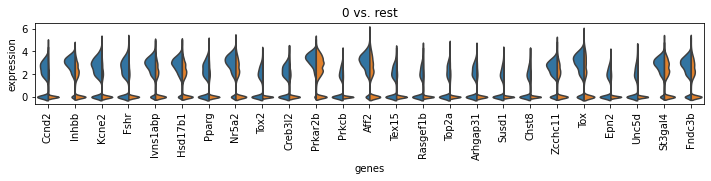

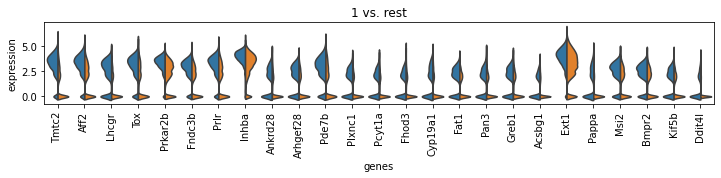

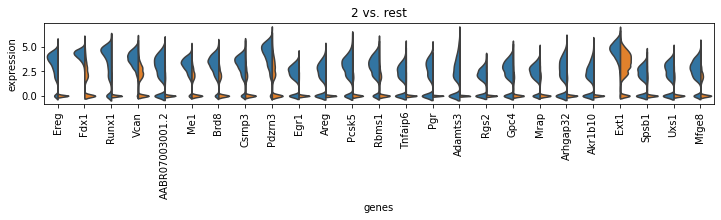

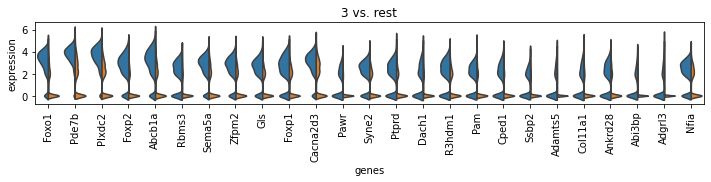

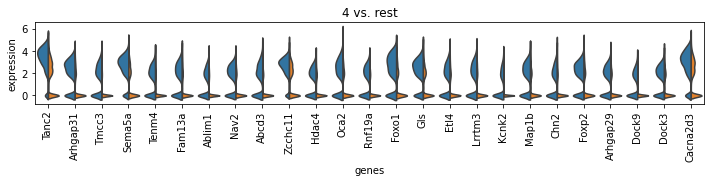

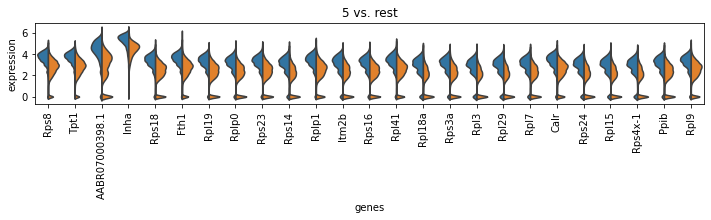

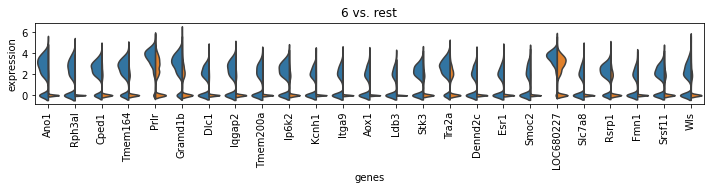

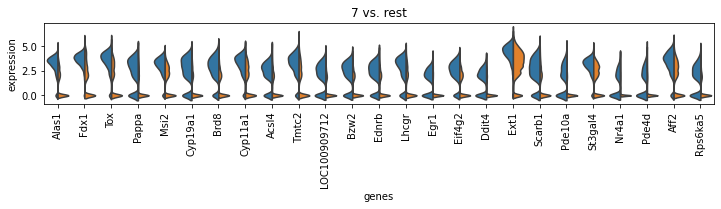

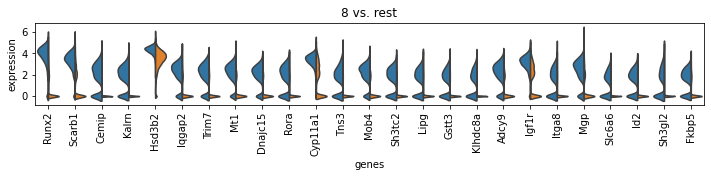

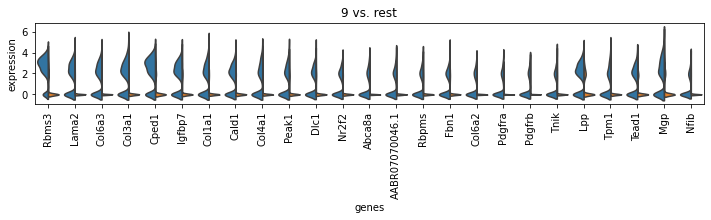

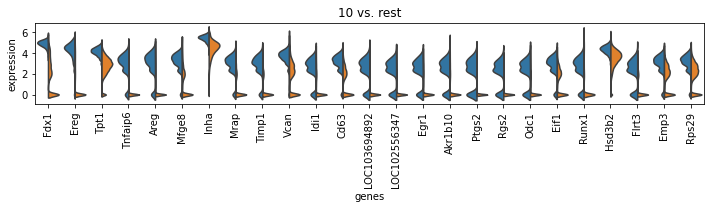

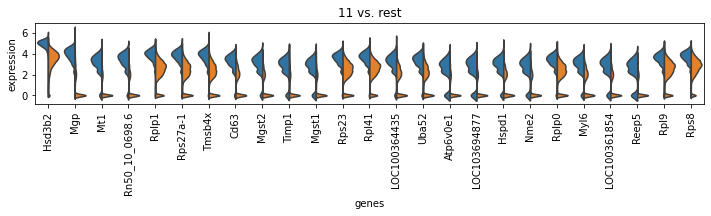

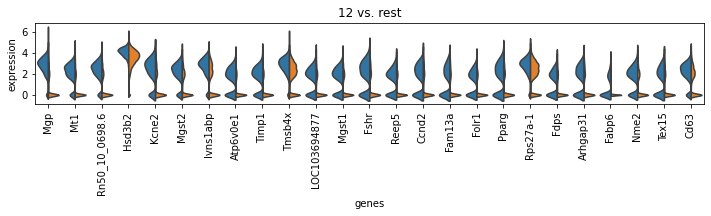

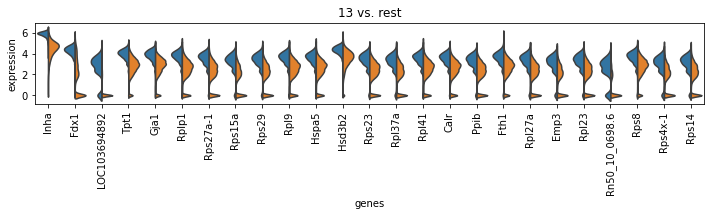

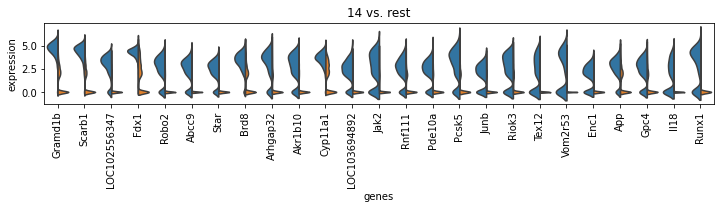

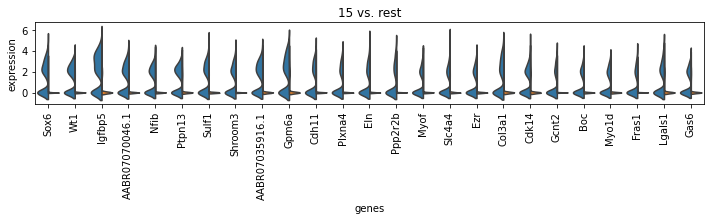

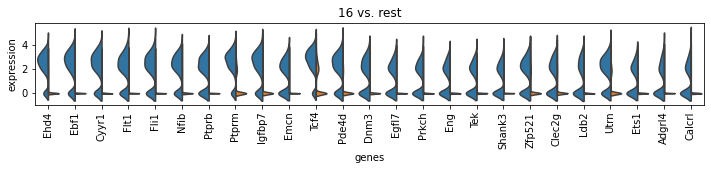

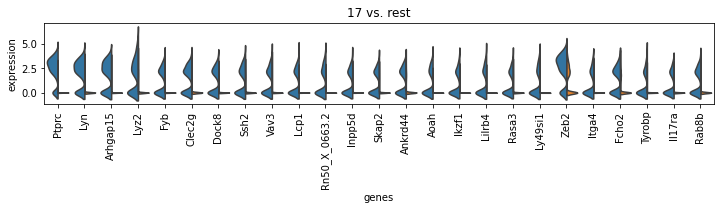

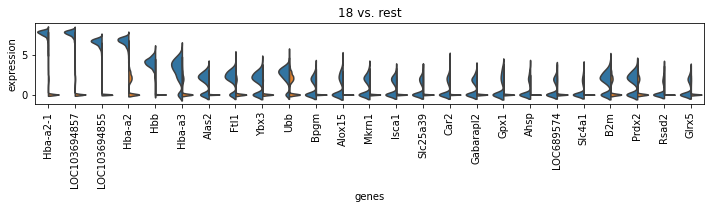

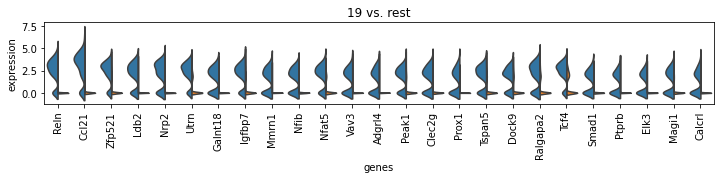

In [4]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (12, 1.5)}):
    sc.pl.rank_genes_groups_violin(adata, n_genes=25, strip=False)

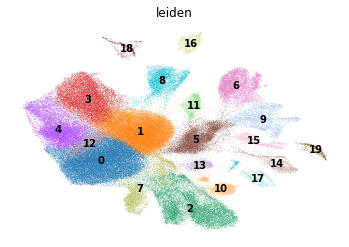

In [5]:
sc.pl.umap(adata,color='leiden',frameon=False,legend_loc='on data')

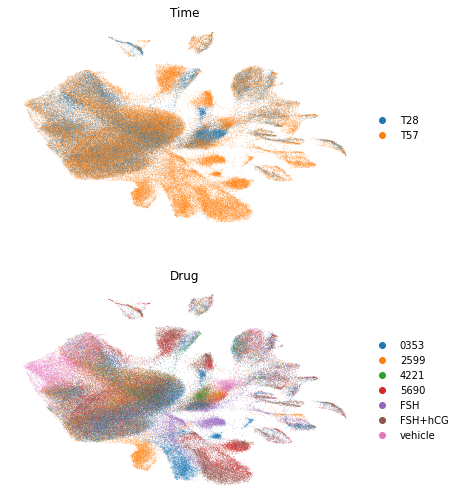

In [6]:
sc.pl.umap(adata,color=['Time','Drug'],ncols=1,frameon=False)

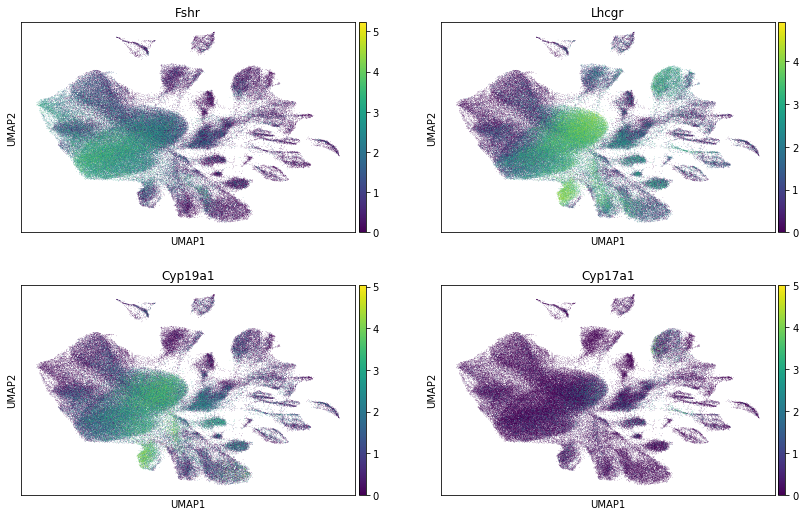

In [12]:
sc.pl.umap(adata,color=['Fshr','Lhcgr','Cyp19a1','Cyp17a1'],ncols=2)

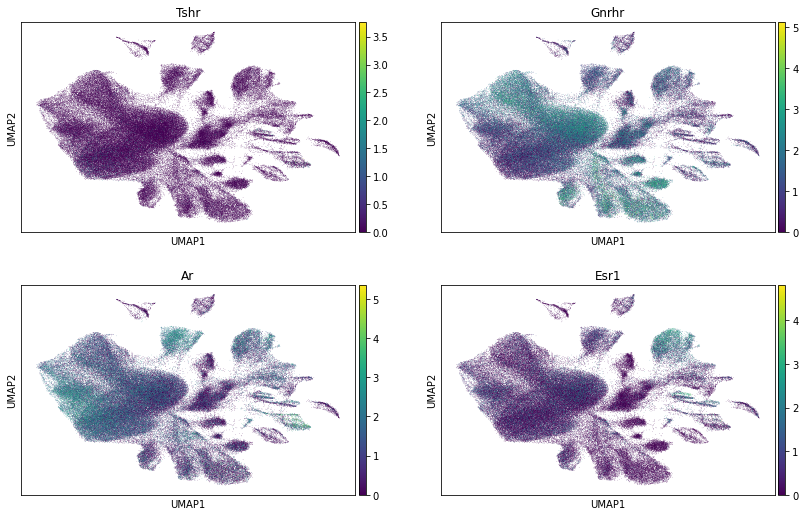

In [19]:
sc.pl.umap(adata,color=['Tshr','Gnrhr','Ar','Esr1'],ncols=2)

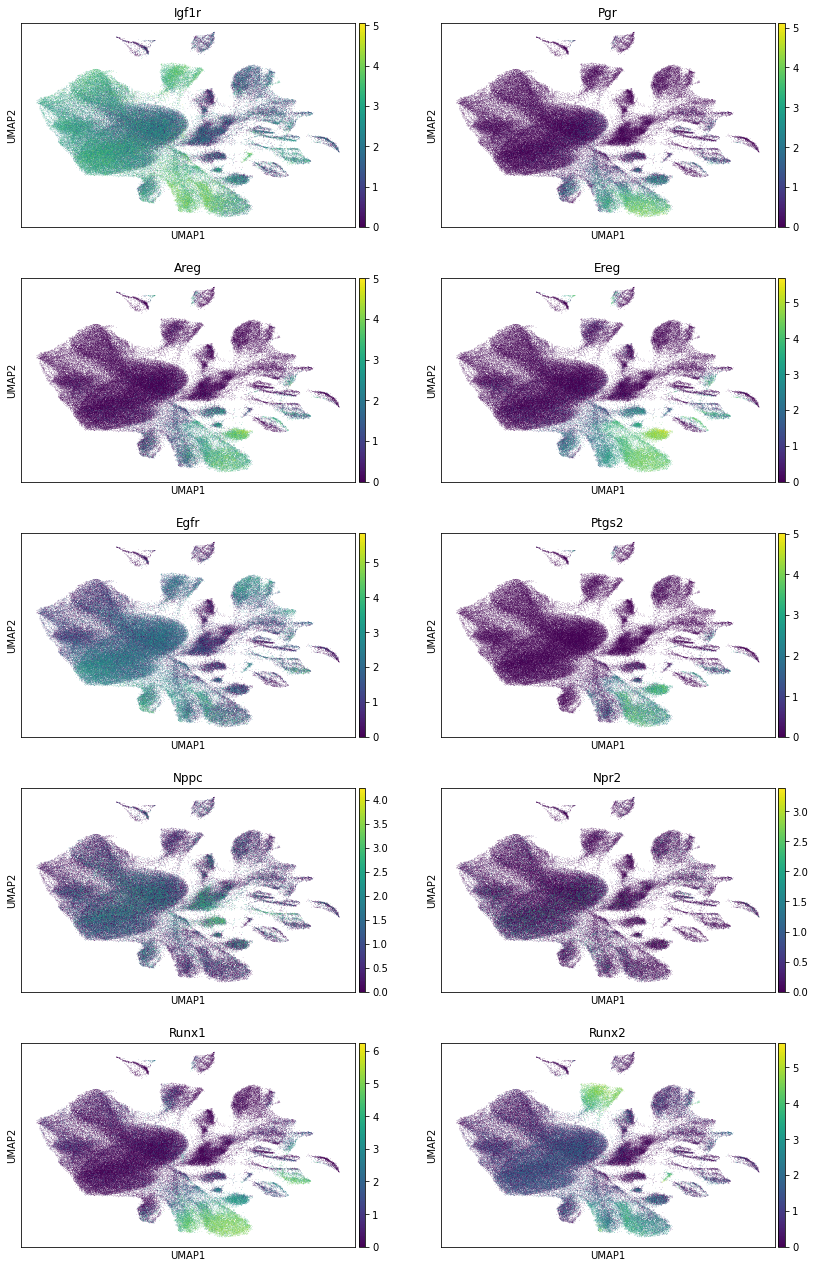

In [8]:
sc.pl.umap(adata,color=['Igf1r','Pgr','Areg','Ereg','Egfr','Ptgs2','Nppc','Npr2','Runx1','Runx2'],ncols=2)

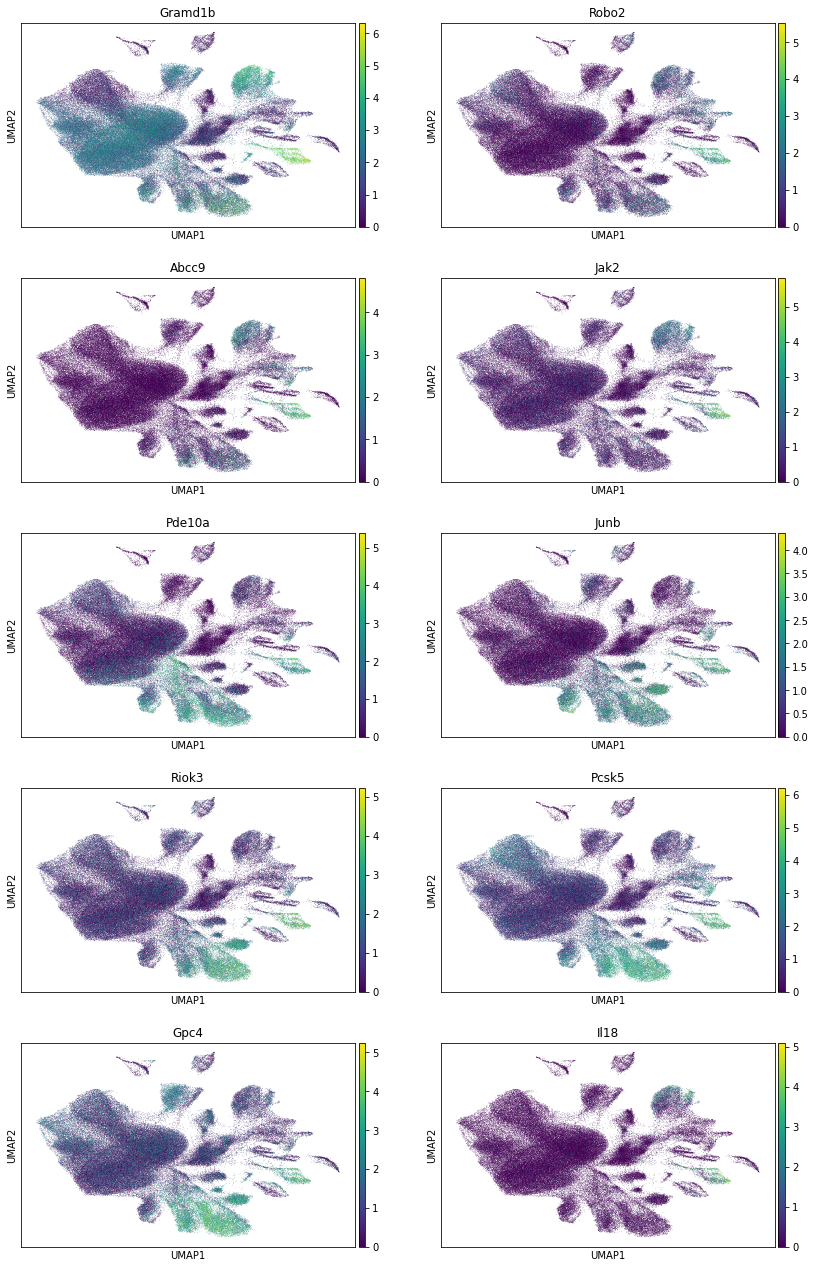

In [6]:
sc.pl.umap(adata,color=['Gramd1b','Robo2','Abcc9','Jak2','Pde10a','Junb','Riok3','Pcsk5','Gpc4','Il18'],ncols=2)

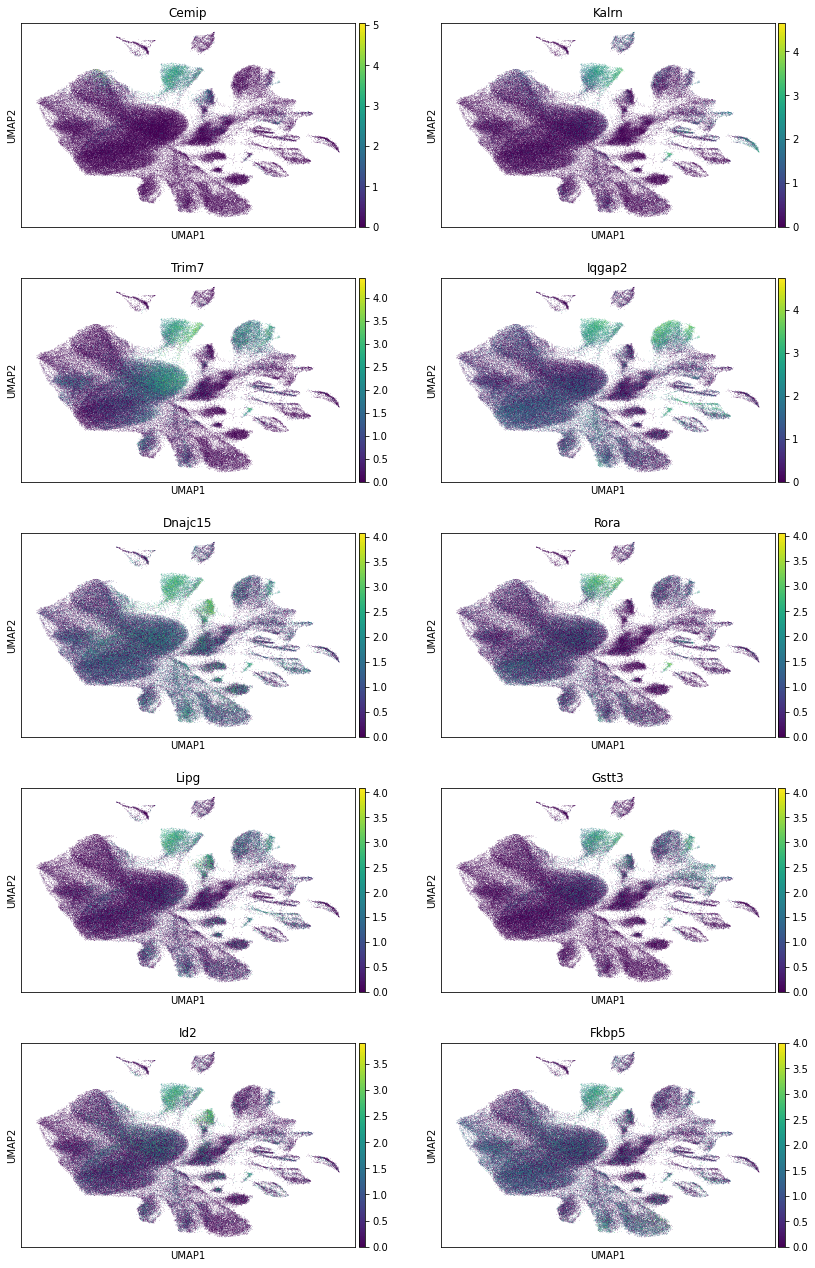

In [7]:
sc.pl.umap(adata,color=['Cemip','Kalrn','Trim7','Iqgap2','Dnajc15','Rora','Lipg','Gstt3','Id2','Fkbp5'],ncols=2)

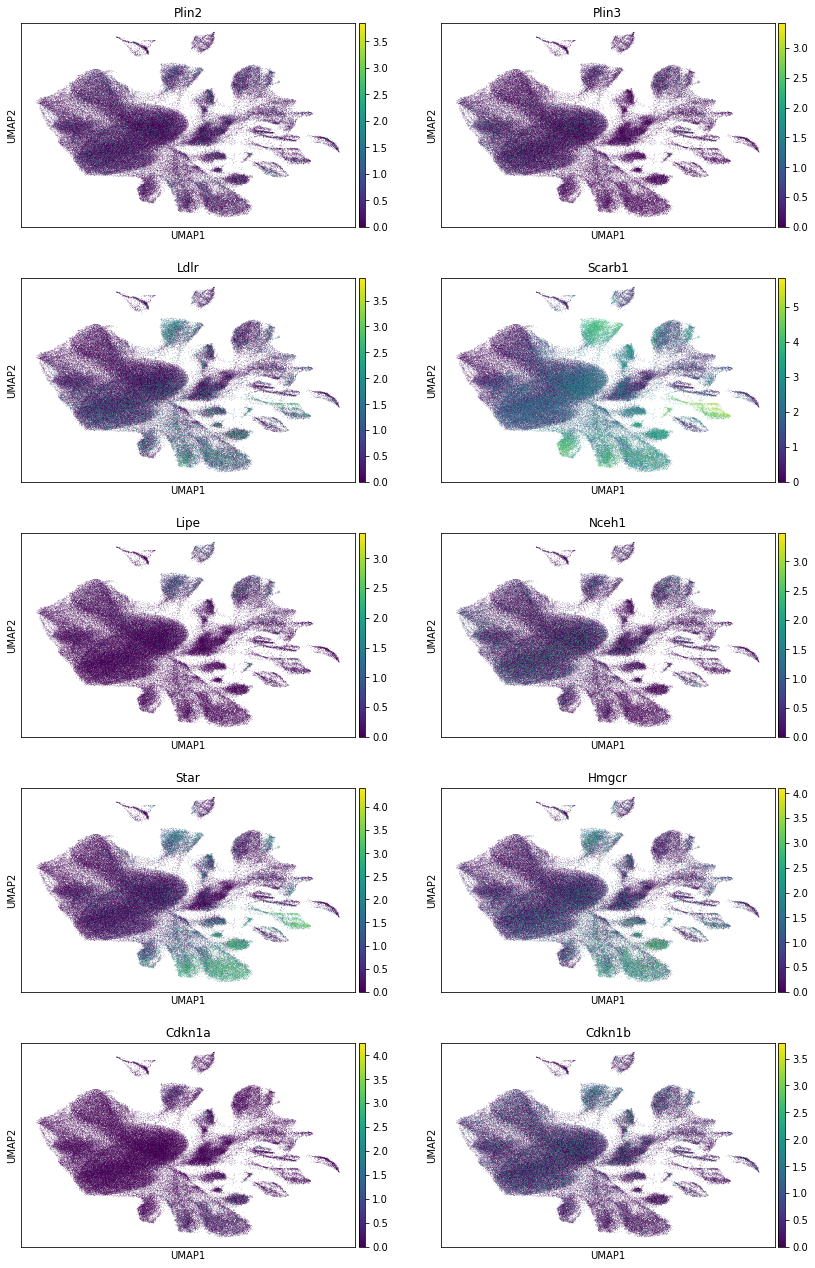

In [9]:
sc.pl.umap(adata,color=['Plin2','Plin3','Ldlr','Scarb1','Lipe','Nceh1','Star','Hmgcr','Cdkn1a','Cdkn1b'],ncols=2)

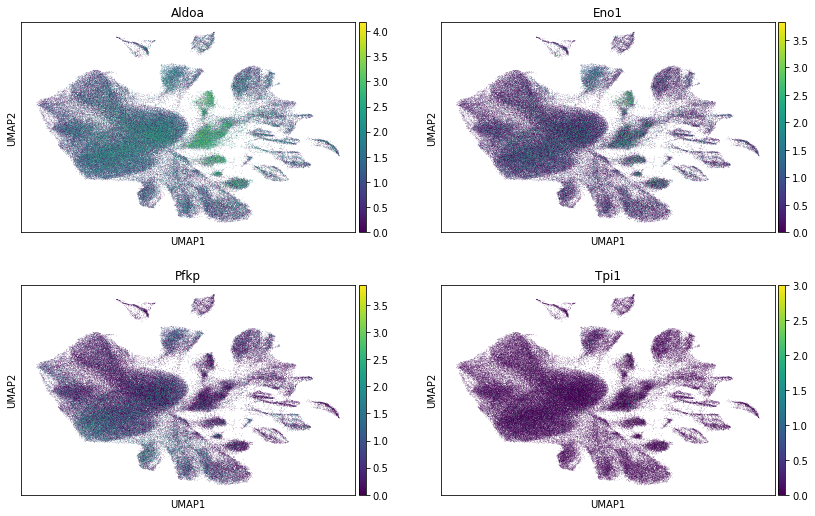

In [10]:
sc.pl.umap(adata,color=['Aldoa','Eno1','Pfkp','Tpi1'],ncols=2)

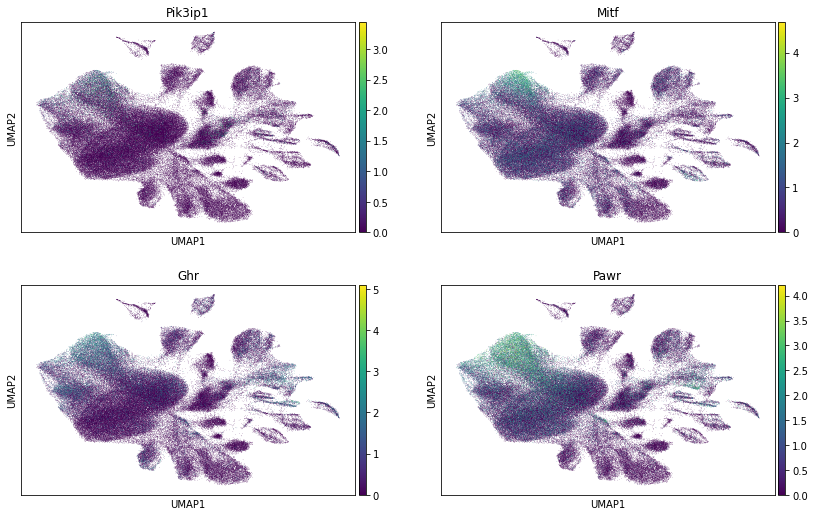

In [13]:
#Atretic markers
sc.pl.umap(adata,color=['Pik3ip1','Mitf','Ghr','Pawr'],ncols=2)

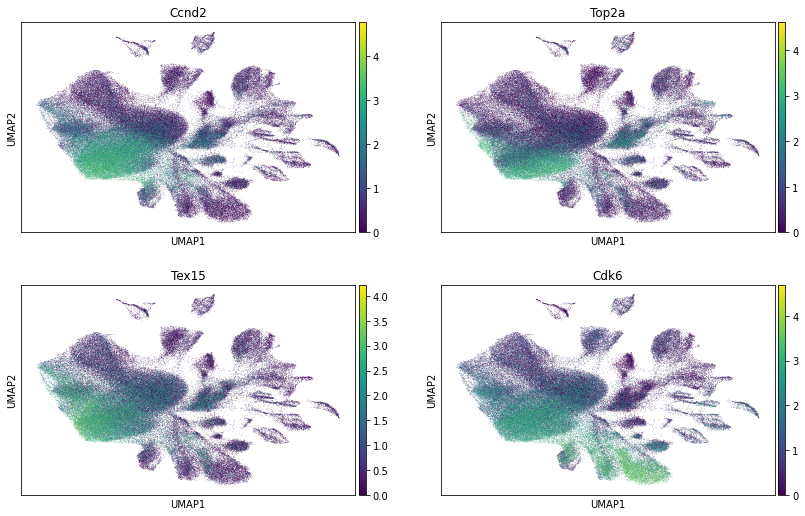

In [9]:
#proliferating GC markers
sc.pl.umap(adata,color=['Ccnd2','Top2a','Tex15','Cdk6'],ncols=2)

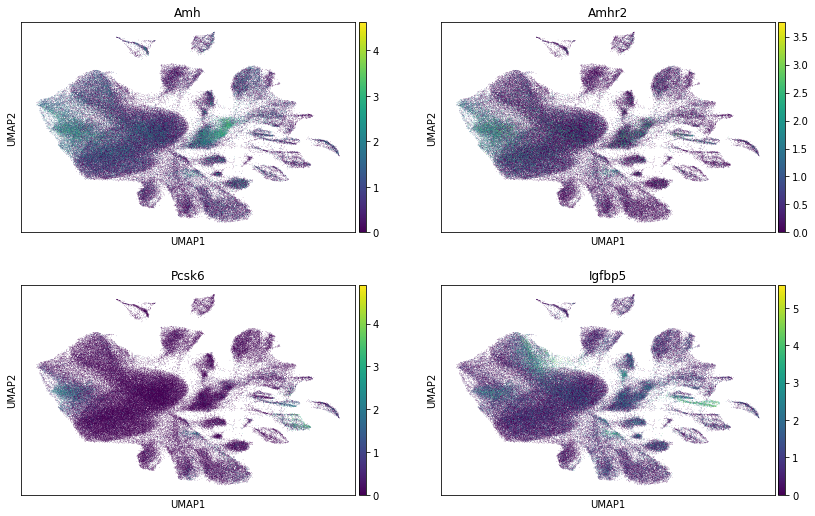

In [10]:
#preantral GC markers
sc.pl.umap(adata,color=['Amh','Amhr2','Pcsk6','Igfbp5'],ncols=2)

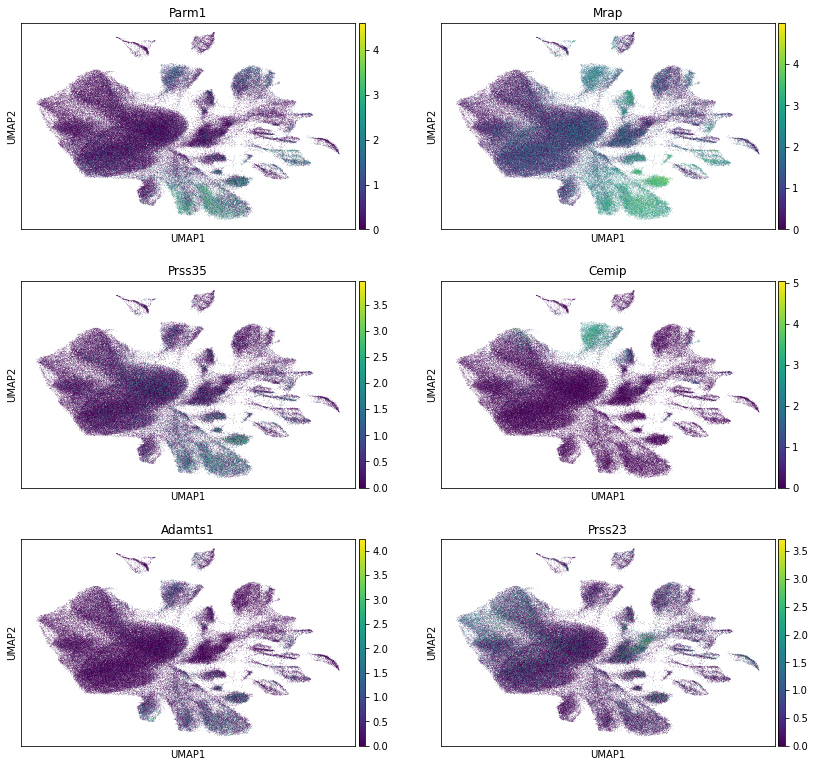

In [8]:
#luteinizing markers
sc.pl.umap(adata,color=['Parm1','Mrap','Prss35','Cemip','Adamts1','Prss23'],ncols=2)

In [7]:
new_cluster_names = {'0':'GC - Proliferating','1':'GC - Antral','2':'GC - Luteinizing','3':'GC - Atretic',
                     '4':'GC - Preantral','5':'Empty','6':'Theca','7':'GC - Luteinizing','8':'Unannotated',
                     '9':'Stroma','10':'GC - Luteinizing','11':'Empty','12':'GC - Proliferating','13':'Empty',
                     '14':'GC - Luteinizing2','15':'Epithelium','16':'BEC','17':'Immune','18':'Reticulocyte',
                     '19':'LEC'}
adata.obs['ann_cluster'] = adata.obs['leiden'].map(new_cluster_names)
adata.obs

sample batch  n_genes  n_genes_by_counts  total_counts  \
AAACCCACAATGGCAG-1-0   Ov133     0     1307               1305        1931.0   
AAACCCACACAAGTGG-1-0   Ov133     0     1147               1145        1642.0   
AAACCCACAGTAGGAC-1-0   Ov133     0     1496               1494        2579.0   
AAACCCACAGTTAGAA-1-0   Ov133     0     2031               2029        3356.0   
AAACCCAGTTGTCAGT-1-0   Ov133     0      795                793        1102.0   
...                      ...   ...      ...                ...           ...   
TTTGGTTTCTCCTGTG-1-29   Ov86    29     1387               1385        2109.0   
TTTGTTGAGAAGTCTA-1-29   Ov86    29      675                673        1141.0   
TTTGTTGAGGCGATAC-1-29   Ov86    29     1430               1428        2556.0   
TTTGTTGTCACGACTA-1-29   Ov86    29      928                927        1493.0   
TTTGTTGTCTTTCTAG-1-29   Ov86    29     1367               1365        1976.0   

                       total_counts_mt  pct_counts_mt leiden Time  Drug  \
AAACCCACAATGGCAG-1-0             209.0      10.823408      0  T28  0353   
AAACCCACACAAGTGG-1-0              82.0       4.993910      0  T28  0353   
AAACCCACAGTAGGAC-1-0             419.0      16.246609      0  T28  0353   
AAACCCACAGTTAGAA-1-0             152.0       4.529202      0  T28  0353   
AAACCCAGTTGTCAGT-1-0              86.0       7.803993      1  T28  0353   
...                                ...            ...    ...  ...   ...   
TTTGGTTTCTCCTGTG-1-29            167.0       7.918445      0  T57  0353   
TTTGTTGAGAAGTCTA-1-29            172.0      15.074496      5  T57  0353   
TTTGTTGAGGCGATAC-1-29            485.0      18.974962      0  T57  0353   
TTTGTTGTCACGACTA-1-29            284.0      19.022102      1  T57  0353   
TTTGTTGTCTTTCTAG-1-29            216.0      10.931174      9  T57  0353   

                         Treatment         ann_cluster  
AAACCCACAATGGCAG-1-0   0353:30_T28  GC - Proliferating  
AAACCCACACAAGTGG-1-0   0353:30_T28  GC - Proliferating  
AAACCCACAGTAGGAC-1-0   0353:30_T28  GC - Proliferating  
AAACCCACAGTTAGAA-1-0   0353:30_T28  GC - Proliferating  
AAACCCAGTTGTCAGT-1-0   0353:30_T28         GC - Antral  
...                            ...                 ...  
TTTGGTTTCTCCTGTG-1-29  0353:10_T57  GC - Proliferating  
TTTGTTGAGAAGTCTA-1-29  0353:10_T57               Empty  
TTTGTTGAGGCGATAC-1-29  0353:10_T57  GC - Proliferating  
TTTGTTGTCACGACTA-1-29  0353:10_T57         GC - Antral  
TTTGTTGTCTTTCTAG-1-29  0353:10_T57              Stroma  

[142243 rows x 12 columns]

In [20]:
marker_genes_dict = {'BEC': ['Tek','Emcn','Vwf'],
                     'EpiC': ['Fras1','Krt18','Ppp2r2b'],
                     'Antral GC': ['Cyp19a1','Lhcgr','Pappa','Mro'],
                     'Atretic GC': ['Mitf','Pik3ip1','Pawr'],
                     'Luteinizing GC': ['Areg','Ereg','Ptgs2','Parm1'],
                     'Preantral GC': ['Pcsk6','Amh','Amhr2'],
                     'Proliferating GC': ['Top2a','Mki67','Prc1'],
                     'Immune': ['Ptprc','Csf1r','Fyb'],
                     'LEC': ['Ccl21','Prox1','Reln'],
                     'Reticulocyte': ['Hbb','Hba-a2','Alas2'],
                     'Stroma': ['Dcn','Pdgfra','Col6a3'],
                     'Theca': ['Cyp17a1','Ano1','Smoc2'],
                    }

[Text(0.5, 0, 'Tek'),
 Text(1.5, 0, 'Emcn'),
 Text(2.5, 0, 'Vwf'),
 Text(3.5, 0, 'Fras1'),
 Text(4.5, 0, 'Krt18'),
 Text(5.5, 0, 'Ppp2r2b'),
 Text(6.5, 0, 'Cyp19a1'),
 Text(7.5, 0, 'Lhcgr'),
 Text(8.5, 0, 'Pappa'),
 Text(9.5, 0, 'Mro'),
 Text(10.5, 0, 'Mitf'),
 Text(11.5, 0, 'Pik3ip1'),
 Text(12.5, 0, 'Pawr'),
 Text(13.5, 0, 'Areg'),
 Text(14.5, 0, 'Ereg'),
 Text(15.5, 0, 'Ptgs2'),
 Text(16.5, 0, 'Parm1'),
 Text(17.5, 0, 'Pcsk6'),
 Text(18.5, 0, 'Amh'),
 Text(19.5, 0, 'Amhr2'),
 Text(20.5, 0, 'Top2a'),
 Text(21.5, 0, 'Mki67'),
 Text(22.5, 0, 'Prc1'),
 Text(23.5, 0, 'Ptprc'),
 Text(24.5, 0, 'Csf1r'),
 Text(25.5, 0, 'Fyb'),
 Text(26.5, 0, 'Ccl21'),
 Text(27.5, 0, 'Prox1'),
 Text(28.5, 0, 'Reln'),
 Text(29.5, 0, 'Hbb'),
 Text(30.5, 0, 'Hba-a2'),
 Text(31.5, 0, 'Alas2'),
 Text(32.5, 0, 'Dcn'),
 Text(33.5, 0, 'Pdgfra'),
 Text(34.5, 0, 'Col6a3'),
 Text(35.5, 0, 'Cyp17a1'),
 Text(36.5, 0, 'Ano1'),
 Text(37.5, 0, 'Smoc2')]

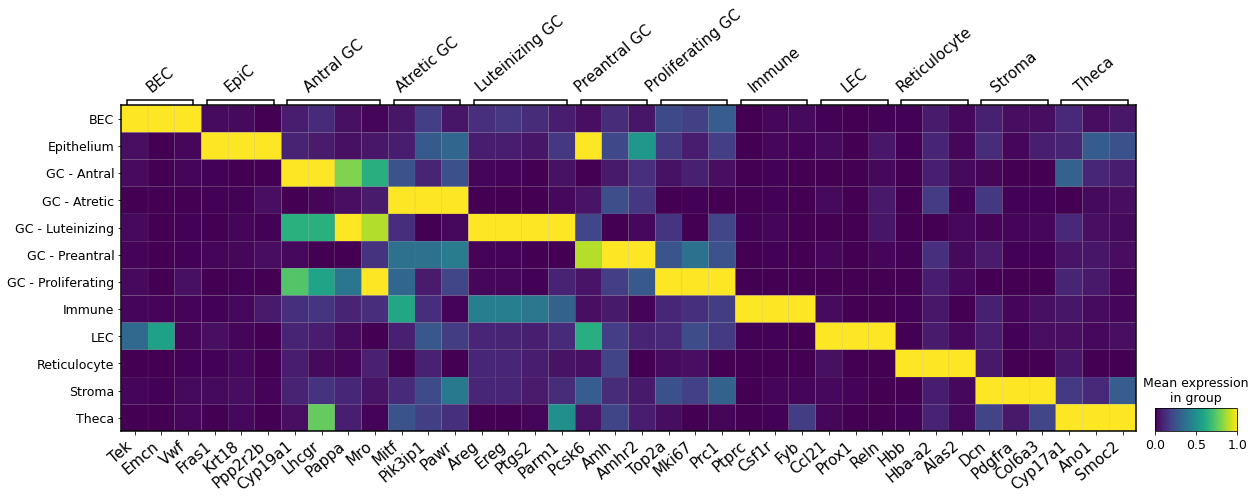

In [22]:
adata1 = adata[(adata.obs['ann_cluster']!='Empty') & (adata.obs['ann_cluster']!='Unannotated') & (adata.obs['ann_cluster']!='GC - Luteinizing2'),:].copy()
plt.rcParams.update({'font.size': 15})
g = sc.pl.matrixplot(adata1,marker_genes_dict,'ann_cluster',standard_scale='var',var_group_rotation=40,figsize=(20,6),return_fig=True)
ax = g.get_axes()['mainplot_ax']
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right',fontsize=15)